## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

**My Variables of Interest: age, sex, race, education, wrkhome (how often you work at home as part of your job), mustwork (whether extra hours are mandatory), childs (number of children), stress (how often you find your work stressful)**

**Logic:I am measuring (a) work–family conflict and (b) job stress, and testing whether they vary with (c) schedule flexibility/mandatory overtime/work-at-home/supervision and (d) basic demographics.**

In [1]:
import pandas as pd

df = pd.read_excel('..\data\GSS.xlsx', engine="openpyxl")

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
C:\Users\oaakb\AppData\Local\Temp\ipykernel_137920\3685569872.py:3: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_excel('..\data\GSS.xlsx', engine="openpyxl")


In [ ]:
#Creat a copy of df
data = df.copy()

data.drop(columns=['ballot', 'id_'], inplace=True)

#Quick look

print(data.dtypes, '\n')
print(data.shape, '\n')
data.describe()


year        int64
childs      int64
age         int64
educ        int64
sex         int64
race        int64
mustwork    int64
stress      int64
dtype: object 

(75699, 8) 



,year,childs,age,educ,sex,race,mustwork,stress
count,75699.000000,75699.000000,75699.000000,75699.000000,75699.000000,75699.000000,75699.000000,75699.000000
mean,1998.864503,1.523164,45.041718,12.664157,1.383783,1.039908,-86.358182,-61.671343
std,15.722971,6.448953,23.436237,7.553211,4.200251,4.855233,33.274468,35.331481
min,1972.000000,-100.000000,-100.000000,-99.000000,-100.000000,-100.000000,-100.000000,-100.000000
25%,1986.000000,0.000000,32.000000,12.000000,1.000000,1.000000,-100.000000,-70.000000
50%,1998.000000,2.000000,44.000000,13.000000,2.000000,1.000000,-100.000000,-70.000000
75%,2012.000000,3.000000,60.000000,16.000000,2.000000,1.000000,-100.000000,-70.000000
max,2024.000000,8.000000,89.000000,20.000000,2.000000,3.000000,2.000000,5.000000


In [ ]:
import numpy as np

#Start Cleaning Data Here --------------------------------

#Check YEAR data
print(data['year'].unique(),'\n')
print(data['year'].value_counts(), '\n')

[1972 1973 1974 1975 1976 1977 1978 1980 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1993 1994 1996 1998 2000 2002 2004 2006 2008 2010
 2012 2014 2016 2018 2021 2022 2024] 

year
2006    4510
2021    4032
2022    3544
2024    3309
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: count, dtype: int64 



In [ ]:
# Num of child data

print(data['childs'].unique(),'\n')
print(data['childs'].value_counts())

#-100 = Inapplicable
#-99 = No answer
#-98 = Do not know/Cannot Choose
#-97 = Skipped on web

data['childs'] = data['childs'].replace([-98, -99, -97, -100], np.nan) #replace all numbers that do not make sense

print(data['childs'].unique(),'\n') #Check

[   0    5    4    2    1    3    6    8    7  -98  -99  -97 -100] 

childs
 0      20956
 2      18989
 1      11979
 3      11671
 4       5996
 5       2669
 6       1381
 8       1032
 7        734
-98       201
-99        52
-97        23
-100       16
Name: count, dtype: int64
[ 0.  5.  4.  2.  1.  3.  6.  8.  7. nan] 



In [ ]:
# AGE data
print(data['age'].unique(),'\n')
print(data['age'].value_counts())

#-100 = Inapplicable
#-99 = No answer
#-98 = Do not know/Cannot Choose

data['age'] = data['age'].replace([-98, -99, -100], np.nan) #replace all numbers that do not make sense

print(data['age'].unique(),'\n') #Check

[  23   70   48   27   61   26   28   21   30   56   54   49   41   24
   62   46   57   58   71   53   42   20   25   78   35   51   76   39
   64   50   40   43   37   22   31   52   47   45   68   63   19   55
   44   34   36   74   69   29   67   75   38   73   84   82   72   59
   33   81   65   32  -99   60   80   66   77   18   79   83   85   88
   87   89   86  -98 -100] 

age
 32     1625
 30     1621
 34     1614
 28     1592
 33     1584
        ... 
-100     226
 86      222
 87      161
 88      133
-98        1
Name: count, Length: 75, dtype: int64
[23. 70. 48. 27. 61. 26. 28. 21. 30. 56. 54. 49. 41. 24. 62. 46. 57. 58.
 71. 53. 42. 20. 25. 78. 35. 51. 76. 39. 64. 50. 40. 43. 37. 22. 31. 52.
 47. 45. 68. 63. 19. 55. 44. 34. 36. 74. 69. 29. 67. 75. 38. 73. 84. 82.
 72. 59. 33. 81. 65. 32. nan 60. 80. 66. 77. 18. 79. 83. 85. 88. 87. 89.
 86.] 



In [ ]:
# SEX data 
print(data['sex'].unique(),'\n')
print(data['sex'].value_counts())

#1 = Male
#2 = Female
#-100 = Inapplicable
#-99 = No answer
#-98 = Do not know/Cannot Choose
#-97 = Skipped on web

data['sex'] = data['sex'].replace([-97, -98, -99, -100], np.nan) #replace all numbers that do not make sense
data["sex"] = data["sex"].map({1: "Male", 2: "Female"}) #Map 1 & 2 with correct gender

print(data['sex'].unique(),'\n') #Check

[   2    1  -99 -100  -97  -98] 

sex
 2      42124
 1      33444
-99        81
-100       19
-97        16
-98        15
Name: count, dtype: int64
['Female' 'Male' nan] 



In [ ]:
# Education data 
print(data['educ'].unique(),'\n')
print(data['educ'].value_counts())

#-99 = No answer
#-98 = Do not know/Cannot Choose

data['educ'] = data['educ'].replace([-98, -99], np.nan) #replace all numbers that do not make sense

print(data['educ'].unique(),'\n') #Check


[ 16  10  12  17  14  13   6   9   8  11   7  15  20  18   3   2   4   5
  19   1 -99   0 -98] 

educ
 12    22202
 16    10666
 14     8651
 13     6188
 11     4046
 15     3484
 18     3187
 10     3079
 8      2812
 17     2571
 9      2209
 20     1941
 19     1166
 7       906
 6       889
 5       414
 4       329
 3       273
 0       189
-99      179
 2       161
-98      107
 1        50
Name: count, dtype: int64
[16. 10. 12. 17. 14. 13.  6.  9.  8. 11.  7. 15. 20. 18.  3.  2.  4.  5.
 19.  1. nan  0.] 



In [ ]:
# Stress data 
print(data['stress'].unique(),'\n')
print(data['stress'].value_counts())

#-100 = Inapplicable
#-99 = No answer
#-98 = Do not know/Cannot Choose
#-97 = Skipped on web
#-70 = Not avaiable in this year
#1-5: Stress level 

data['stress'] = data['stress'].replace([-70, -97, -98, -99, -100], np.nan) #replace all numbers that do not make sense

print(data['stress'].unique(),'\n') #Check

[ -70 -100  -99    3    2    4  -98    5    1  -97] 

stress
-70     41893
-99     11374
 3       6980
-100     6503
 2       3722
 4       2555
 1       1613
 5       1009
-98        35
-97        15
Name: count, dtype: int64
[nan  3.  2.  4.  5.  1.] 



In [ ]:
# Race data 
print(data['race'].unique(),'\n')
print(data['race'].value_counts())

#-100 = Inapplicable
#1 = White
#2 = Black
#3 = Other

data['race'] = data['race'].replace([-100], np.nan) #replace all numbers that do not make sense
data["race"] = data["race"].map({1: "White", 2: "Black", 3: "Other"})#Map the type of race with the number (1-3)

print(data['race'].unique(),'\n') #Check

[   1    2    3 -100] 

race
 1      59937
 2      10787
 3       4803
-100      172
Name: count, dtype: int64
['White' 'Black' 'Other' nan] 



In [ ]:
# Mustwork data 
print(data['mustwork'].unique(),'\n')
print(data['mustwork'].value_counts())

#-100 = Inapplicable
#-99 = No answer
#-98 = Do not know/Cannot Choose
#-97 = Skipped on web
#-70 = Not avaiable in this year
#1: Mandatory to work extra hours
#2: Not Mandatory to work extra hours

data['mustwork'] = data['mustwork'].replace([-70, -97, -98, -99, -100], np.nan) #replace all numbers that do not make sense

data["mustwork"] = data["mustwork"].map({1: "Mandatory", 2: "Not mandatory"})#Map 1 & 2 to wether it is mandatory to work extra hours of work or not

print(data['mustwork'].unique(),'\n') #Check

[-100    2    1  -99  -98  -97  -70] 

mustwork
-100    62971
 2       6736
-70      3309
 1       2435
-99       121
-98       107
-97        20
Name: count, dtype: int64
[nan 'Not mandatory' 'Mandatory'] 



EDA Starts Here -----------------------------------------------------------------

In [ ]:
# starting Exploratory Data Analysis Here ---------------------------------------

print(data.head())
print('\n')
print(data.sample(5, random_state=0))
print('\n')
print(data.info())
print('\n')
print(data.describe(include="all"))

   year  childs   age  educ     sex   race mustwork  stress
0  1972     0.0  23.0  16.0  Female  White      NaN     NaN
1  1972     5.0  70.0  10.0    Male  White      NaN     NaN
2  1972     4.0  48.0  12.0  Female  White      NaN     NaN
3  1972     0.0  27.0  17.0  Female  White      NaN     NaN
4  1972     2.0  61.0  12.0  Female  White      NaN     NaN


       year  childs   age  educ     sex   race       mustwork  stress
56399  2012     2.0  52.0  12.0    Male  White            NaN     4.0
11864  1980     0.0  32.0  16.0    Male  White            NaN     NaN
16896  1984     7.0  58.0   9.0  Female  White            NaN     NaN
982    1972     1.0  88.0  15.0  Female  White            NaN     NaN
64140  2018     6.0  74.0  19.0    Male  White  Not mandatory     3.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75699 entries, 0 to 75698
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      75699 non-null 

In [16]:
# basic missingness
print(data[["age","educ","childs","stress","sex","race","mustwork"]].isna().mean().sort_values(ascending=False))#This will tell us which variables have the most missing data, as a proportion of the rows
print('\n')

mustwork    0.878849
stress      0.790235
age         0.011493
childs      0.003857
educ        0.003778
race        0.002272
sex         0.001731
dtype: float64




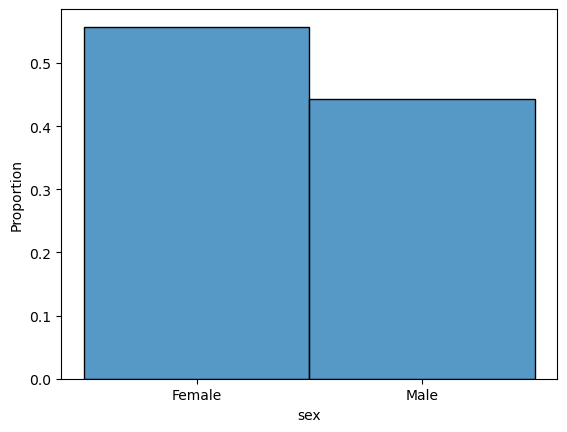

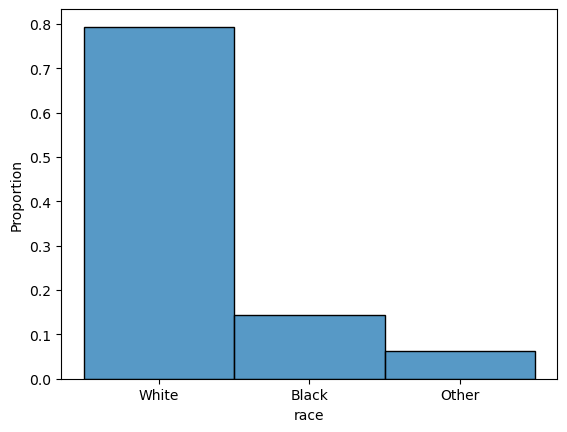

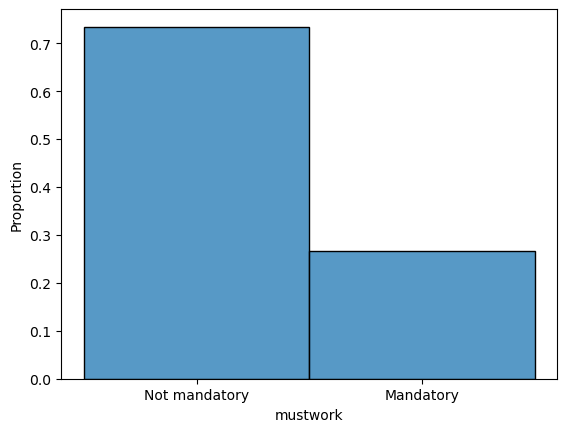

In [32]:
#Lets analyse some of the categorical varibales: Sex, Race, Mustwork
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=data,x='sex',stat='proportion') 
plt.show()

sns.histplot(data=data,x='race',stat='proportion') 
plt.show()

sns.histplot(data=data,x='mustwork',stat='proportion') 
plt.show()

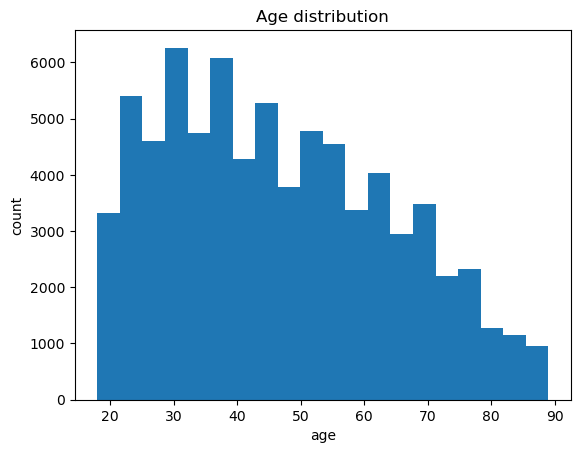

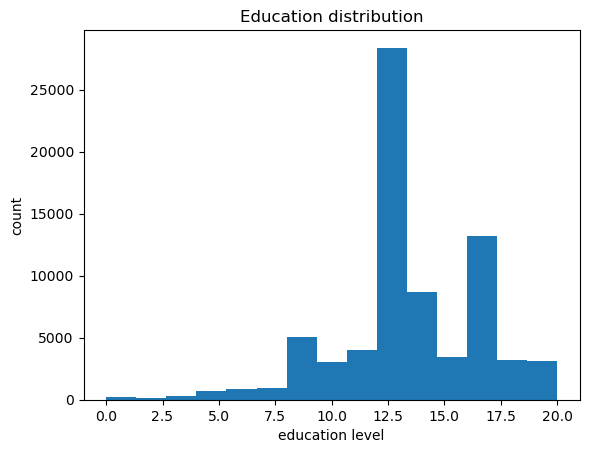

<Axes: xlabel='stress'>

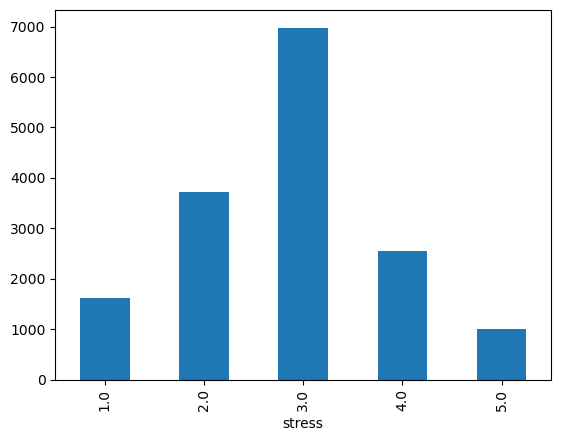

In [17]:
#Let us make some histograms to visualize the numeric variables: Age, year, stress, childs, eudc
import matplotlib.pyplot as plt
import seaborn as sns

data['age'].hist(bins=20,grid=False)
plt.title("Age distribution")
plt.xlabel("age")
plt.ylabel("count")
plt.show()

data['educ'].hist(bins=15,grid=False)
plt.title("Education distribution")
plt.xlabel("education level")
plt.ylabel("count")
plt.show()

data["stress"].value_counts(dropna=True).sort_index().plot(kind="bar")

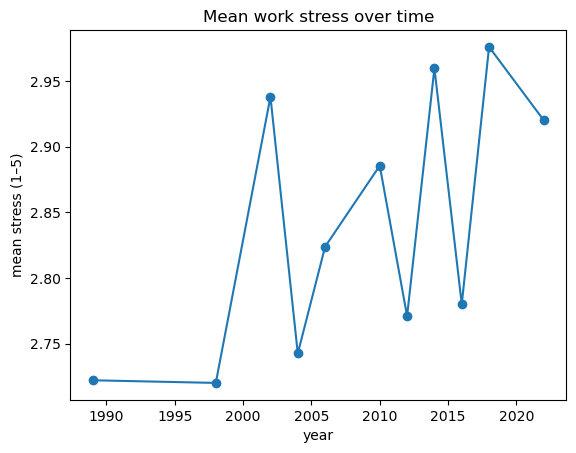

In [ ]:
# mean stress over time

tmp = data[["year","stress"]].dropna()
s = tmp.groupby("year")["stress"].mean()

import matplotlib.pyplot as plt
plt.plot(s.index, s.values, marker="o")
plt.xlabel("year")
plt.ylabel("mean stress (1–5)")
plt.title("Mean work stress over time")
plt.show()

C:\Users\oaakb\AppData\Local\Temp\ipykernel_137920\1035392620.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=["Mandatory", "Not mandatory"])


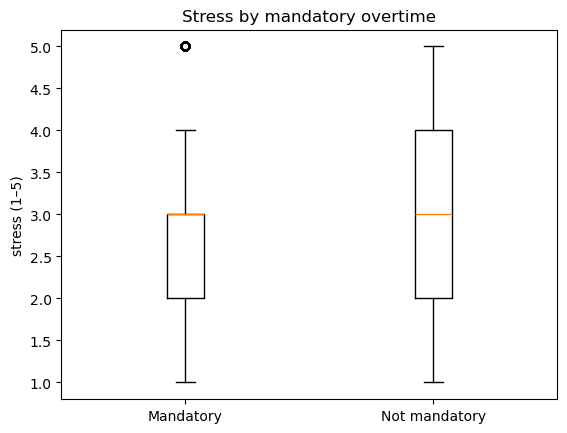

In [34]:
groups = [data.loc[data["mustwork"]=="Mandatory", "stress"].dropna(),
          data.loc[data["mustwork"]=="Not mandatory", "stress"].dropna()]

plt.boxplot(groups, labels=["Mandatory", "Not mandatory"])
plt.ylabel("stress (1–5)")
plt.title("Stress by mandatory overtime")
plt.show()

In [35]:
print(data.groupby(["sex","mustwork"])["stress"].mean().unstack(),'\n')

print(data.groupby(["race","mustwork"])["stress"].mean().unstack(),'\n')

mustwork  Mandatory  Not mandatory
sex                               
Female     2.724977       2.935280
Male       2.831486       3.022505 

mustwork  Mandatory  Not mandatory
race                              
Black      3.121359       3.136831
Other      2.917355       3.034074
White      2.686330       2.935465 



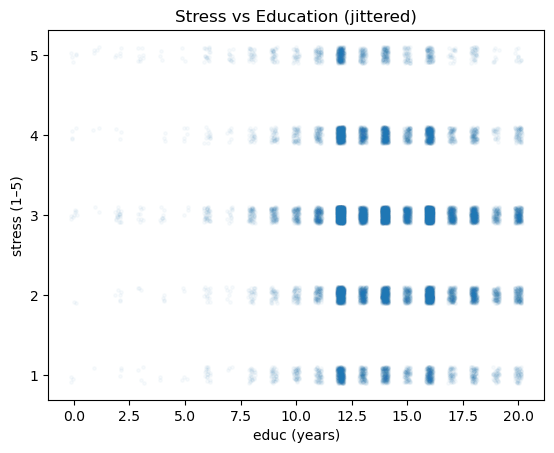

In [38]:
tmp = data[["educ","stress"]].dropna()

x = tmp["educ"] + np.random.uniform(-0.15, 0.15, len(tmp))
y = tmp["stress"] + np.random.uniform(-0.10, 0.10, len(tmp))

plt.scatter(x, y, s=6, alpha=0.03)
plt.xlabel("educ (years)")
plt.ylabel("stress (1–5)")
plt.title("Stress vs Education (jittered)")
plt.show()

In [39]:
data.groupby("childs")["stress"].mean().head(8)

childs
0.0    2.808685
1.0    2.791941
2.0    2.839048
3.0    2.938435
4.0    2.960596
5.0    2.988406
6.0    3.129630
7.0    2.970149
Name: stress, dtype: float64

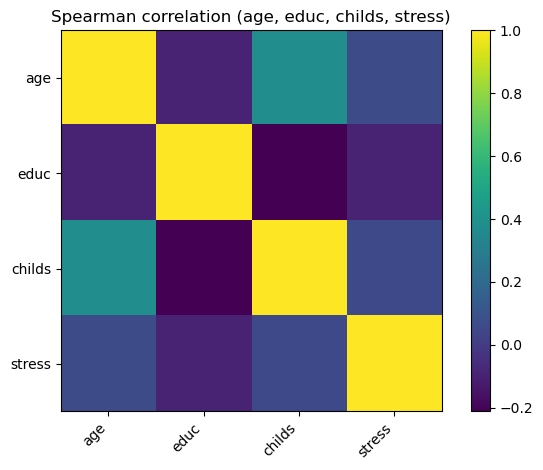

In [21]:
num = data[["age","educ","childs","stress"]].copy()
corr = num.corr(method="spearman")

plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Spearman correlation (age, educ, childs, stress)")
plt.tight_layout()
plt.show()


In [23]:
tmp = data[["educ","stress"]].dropna()
print("rows plotted:", len(tmp))
print("unique (educ,stress) pairs:", tmp.drop_duplicates().shape[0])

rows plotted: 15852
unique (educ,stress) pairs: 103


C:\Users\oaakb\AppData\Local\Temp\ipykernel_137920\434102840.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=races)


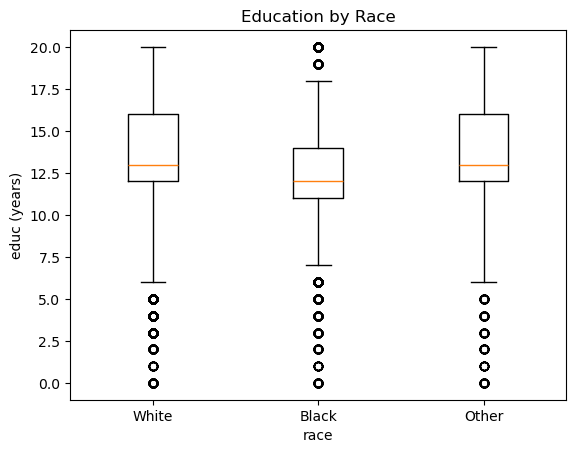

In [42]:
tmp = data[["race","educ"]].dropna()
races = tmp["race"].unique()

groups = [tmp.loc[tmp["race"]==r, "educ"] for r in races]

plt.boxplot(groups, labels=races)
plt.xlabel("race")
plt.ylabel("educ (years)")
plt.title("Education by Race")
plt.show()

**Findings and Interpretation (EDA Write-Up)**

**Data overview and missingness:**

This analysis uses a subset of GSS variables focused on work–family conflict and job stress: age, sex, race, education (educ), wrkhome, mustwork (mandatory overtime), childs, and stress. The main outcomes I examined are stress (1–5 scale) and indicators of schedule constraints/flexibility (especially mustwork and, when available, wrkhome).

A major feature of this extract is high missingness in key work variables, especially mustwork and stress. The missingness summary shows that mustwork is missing for most respondents (only a minority have valid responses), and stress is also missing for a large fraction of the sample. In contrast, the demographic variables (age, sex, race, educ, childs) have relatively low missingness. This matters because any analysis that conditions on mustwork and stress is effectively studying a smaller, selected subsample of respondents who were asked these questions (or who answered them). 

**Sample composition (sex and race):**

The proportion plots indicate the sample is slightly more female than male, and the race distribution is predominantly White, with smaller proportions Black and “Other.” These descriptive distributions are useful context because group comparisons (e.g., mandatory overtime rates by sex or race) reflect both underlying patterns and the composition of the sample.

**Baseline distributions: age, education, and stress**

The age distribution is broad (adult respondents spanning roughly late teens through older ages), with more density in early-to-mid adulthood and a tapering at older ages. The education distribution is concentrated around common schooling milestones (notably around the “high school” and “college” region), which is typical in large social surveys.

For stress, the histogram shows responses are heavily concentrated in the middle categories. Stress = 3 is the most common response, followed by 2 and 4, with relatively fewer observations at the extremes (1 and 5). The summary statistics you computed are consistent with this. The mean stress is around the high-2s, and the median is about 3, suggesting that a “moderate stress” response is typical for those who answered the question. The boxplot on the original scale also shows many respondents clustered around the middle with some spread upward and downward.

**Stress over time (descriptive trend):**

The plot of mean stress by year suggests that average reported stress is fairly stable but shows some upward drift and noticeable variation across survey years, with more pronounced peaks in later years. Because this is a simple mean-by-year plot, it should be read as a descriptive time-series pattern rather than a structural trend: changes could reflect real shifts in work stress, changing composition of the workforce, different modules/wordings, or which respondents were asked the stress item in different waves.

**Mandatory overtime (mustwork) and stress:**

The mustwork proportion plot indicates “Not mandatory” is more common than “Mandatory” among respondents who answered the question. When looking at stress by mustwork using boxplots, the median stress looks similar across groups (around 3), but the spread appears somewhat different. In your plot, the “Not mandatory” group shows a wider upper spread (more mass toward higher stress values), while the “Mandatory” group is more concentrated around the middle (with at least one high outlier). The key point is that mandatory overtime is not associated with a dramatic shift in the central tendency of stress in this subsample; instead, any difference appears more about dispersion/variability than about a clearly higher median.

However, this comparison should be interpreted carefully because it depends on the intersection of non-missing mustwork and non-missing stress, which is much smaller than the full dataset. If the people asked mustwork differ systematically (by job type, industry, hours, etc.), the observed pattern might partly reflect selection into the subsample.

**Mandatory overtime rates by sex and race:**

Your crosstab-style table shows meaningful differences in the prevalence of mandatory overtime by demographic group:

By sex: males have a higher share in the “Mandatory” category than females (i.e., mandatory overtime appears more common among men than women among those who answered mustwork).

By race: the “Mandatory” share appears highest among Black respondents, followed by “Other” and then White respondents (differences are not huge, but they are consistent in direction).

These differences suggest that schedule constraints like mandatory overtime may be unevenly distributed across demographic groups, which matters for interpreting stress differences: if some groups are more likely to face mandatory overtime, then any stress disparities could reflect differences in job conditions as well as broader social factors.

**Education, children, and stress:**

The jittered scatter of stress vs. education shows no strong monotonic relationship. Stress values appear across the full education range, with heavy clustering (because stress is ordinal 1–5). If there is a relationship, it is subtle: higher education does not cleanly map to uniformly lower or higher stress in the scatter.

The groupby results for average stress by number of children show relatively small changes across child counts (mostly hovering around the high-2s to ~3). The pattern is not strictly increasing or decreasing; rather, it looks like stress varies modestly by number of children, with some higher averages at certain child counts. This is consistent with the idea that children can increase demands and time pressure, but the relationship is likely confounded by age, income, household structure, and work context.

**Correlation summary (Spearman):**

The Spearman correlation heatmap helps summarize monotonic relationships among numeric variables without assuming linearity. The most notable patterns are that age and childs show a positive relationship (older respondents tend to have more children, up to a point), which is expected. Educ and childs appear negatively related (more education correlates with fewer children on average), a common demographic pattern.Stress has weak correlations with age/education/children (i.e., no single demographic variable strongly explains stress levels in this subset). This matches the earlier plots: stress is centered around moderate values and does not sharply separate by education or children alone.

**Education by Race boxplot summary:**

This boxplot suggests education levels differ somewhat by race. The median education for White and Other respondents is slightly higher (around the low-teens) than for Black respondents, whose median is a bit lower. All three groups show wide spreads and many low-education outliers, meaning there’s substantial variation within each race category even though the center shifts slightly across groups.

**Conclusion:**

Given the very high missingness in mustwork/stress (and likely wrkhome), the next step—if this were extended beyond EDA—would be to explicitly define the analysis sample (e.g., restricting to respondents with non-missing stress and mustwork), report those sample sizes, and consider whether missingness is systematic. For this EDA, the results provide a descriptive picture of how reported stress relates to a small set of demographic and work-constraint variables

Appendix------------------------------------------------------------------------------------------

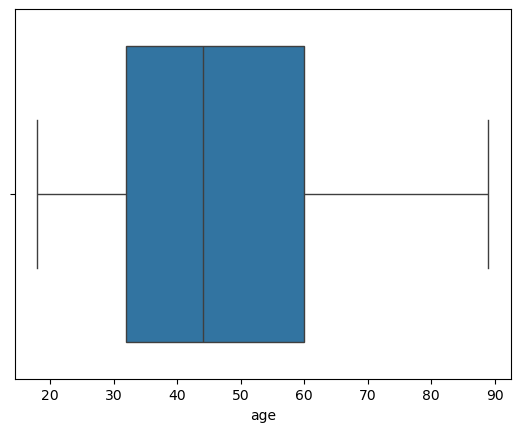

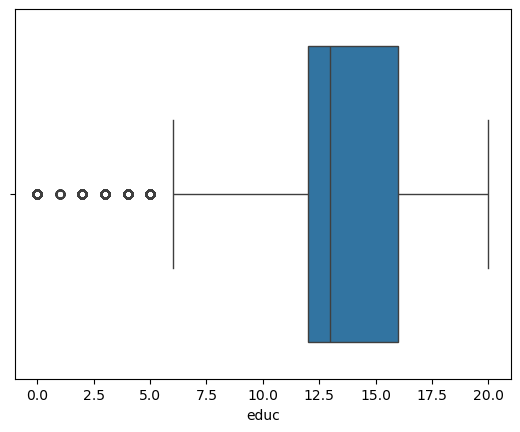

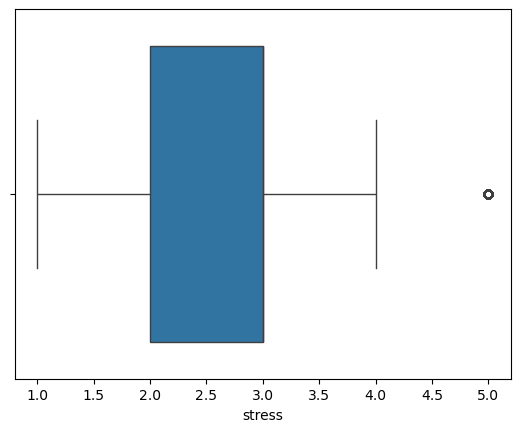

In [41]:
import seaborn as sns # Import Seaborn

#Lets analysis some box and whisker plots to see the spread of the numeric variables

# Boxplot:
var = 'age'
#sns.boxplot(df[var]) # A boxplot
sns.boxplot(data=data, x=var) # Same thing, but horizontal
plt.show()

var = 'educ'
#sns.boxplot(df[var]) # A boxplot
sns.boxplot(data=data, x=var) # Same thing, but horizontal
plt.show()

var = 'stress'
#sns.boxplot(df[var]) # A boxplot
sns.boxplot(data=data, x=var) # Same thing, but horizontal
plt.show()

[Text(0.5, 1.0, 'Age Density'), Text(0.5, 0, 'Age'), Text(0, 0.5, 'Density')]

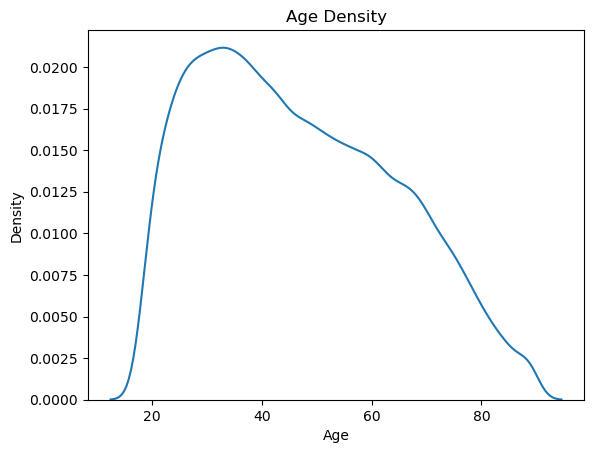

In [26]:
var = 'age'
fig = sns.kdeplot(data[var]) 
fig.set(title='Age Density',
xlabel='Age', 
ylabel='Density')

In [28]:
# simple relationships
print(pd.crosstab(data["sex"], data["mustwork"], normalize="index"),'\n')

print(pd.crosstab(data["race"], data["mustwork"], normalize="index"))

mustwork  Mandatory  Not mandatory
sex                               
Female     0.228052       0.771948
Male       0.305631       0.694369 

mustwork  Mandatory  Not mandatory
race                              
Black      0.298132       0.701868
Other      0.265021       0.734979
White      0.258939       0.741061


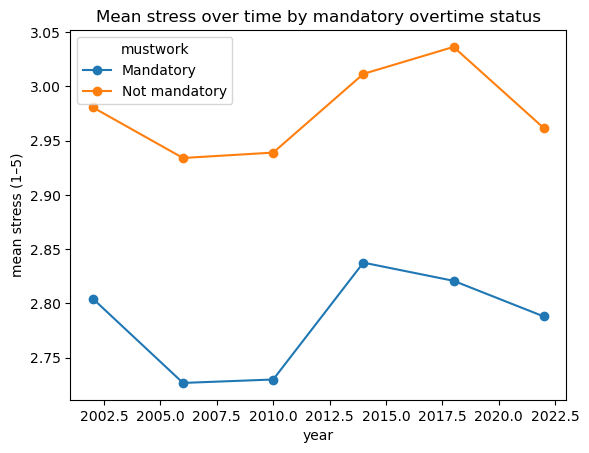

In [31]:
tmp = data[["year","stress","mustwork"]].dropna()
g = tmp.groupby(["year","mustwork"])["stress"].mean().unstack()

g.plot(marker="o")
plt.xlabel("year")
plt.ylabel("mean stress (1–5)")
plt.title("Mean stress over time by mandatory overtime status")
plt.show()

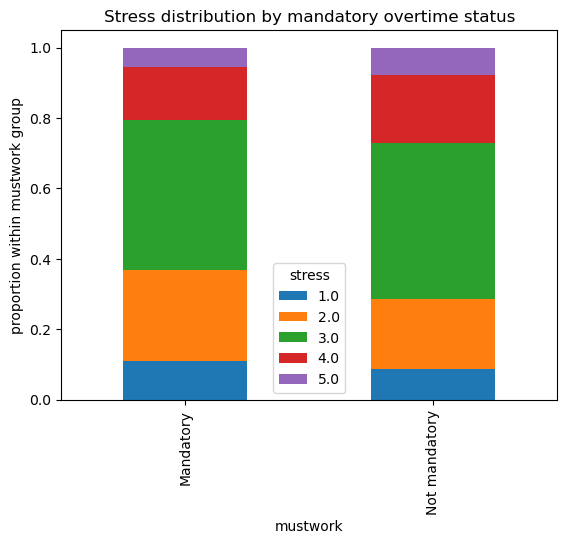

mustwork
Mandatory        2.784476
Not mandatory    2.975224
Name: stress, dtype: float64

In [40]:
pd.crosstab(data["mustwork"], data["stress"], normalize="index").plot(kind="bar", stacked=True)
plt.title("Stress distribution by mandatory overtime status")
plt.ylabel("proportion within mustwork group")
plt.show()

data.groupby("mustwork")["stress"].mean()